In [1]:
!pip install git+https://github.com/syrte/ndtest

Defaulting to user installation because normal site-packages is not writeable
  Cloning https://github.com/syrte/ndtest to /tmp/pip-req-build-1fbxw0gr
  Running command git clone --filter=blob:none --quiet https://github.com/syrte/ndtest /tmp/pip-req-build-1fbxw0gr
  Resolved https://github.com/syrte/ndtest to commit 8b15ea9009148a4e124a1d3ecdc58216d765a05b
  Preparing metadata (setup.py) ... done


In [2]:
import sys
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from kl_formulas import compute_kl_divergence, kl_divergence, estimate_density, kl_divergence_matrix
from sklearn.decomposition import PCA

# append the filepath to where ndtest is installed
sys.path.append('/home/username/.local/lib/python3.10/site-packages')
# sys.path.append('/home/millerm/.local/lib/python3.10/site-packages')

import ndtest

## Create Targets

In [3]:
file_name = "ml4h_data/project2/project2_TS_input/ptbdb_train.csv"
df_train = pd.read_csv(file_name,header=None)
x_train = df_train.iloc[:, df_train.columns != 187]
x_train_ptb = x_train.values.reshape(-1, 1, 187)
train_target = df_train.iloc[:, 187]
train_target_ptb = train_target.values
train_target_ptb

array([1., 1., 0., ..., 1., 1., 1.])

In [4]:
file_name = "ml4h_data/project2/project2_TS_input/ptbdb_test.csv"
df_test = pd.read_csv(file_name,header=None)
x_test = df_test.iloc[:, df_test.columns != 187]
x_test_ptb = x_test.values.reshape(-1, 1, 187)
test_target = df_test.iloc[:, 187]
test_target_ptb = test_target.values
test_target_ptb

array([0., 1., 0., ..., 1., 1., 0.])

In [5]:
file_name = "ml4h_data/project2/project2_TS_input/mitbih_train.csv"
df_train = pd.read_csv(file_name,header=None)
x_train = df_train.iloc[:, df_train.columns != 187]
x_train_mit = x_train.values.reshape(-1, 1, 187)
train_target = df_train.iloc[:, 187]
train_target_mit = train_target.values
train_target_mit

array([0., 0., 0., ..., 4., 4., 4.])

In [6]:
file_name = "ml4h_data/project2/project2_TS_input/mitbih_test.csv"
df_test = pd.read_csv(file_name,header=None)
x_test = df_test.iloc[:, df_test.columns != 187]
x_test_mit = x_test.values.reshape(-1, 1, 187)
test_target = df_test.iloc[:, 187]
test_target_mit = test_target.values
test_target_mit

array([0., 0., 0., ..., 4., 4., 4.])

## Load Embeddings

In [7]:
mit_train_embeddings = np.load('data/mit_train_embeddings.npy')
mit_test_embeddings = np.load('data/mit_test_embeddings.npy')
ptb_train_embeddings = np.load('data/ptb_train_embeddings.npy')
ptb_test_embeddings = np.load('data/ptb_test_embeddings.npy')

## PCA and Kullback-Leibler Divergence

In [8]:
pca = PCA(n_components = 2)

In [9]:
pca_train_ptb_reduced = pca.fit_transform(ptb_train_embeddings)
pca_test_ptb_reduced = pca.transform(ptb_test_embeddings)
pca_train_mit_reduced = pca.fit_transform(mit_train_embeddings)
pca_test_mit_reduced = pca.transform(mit_test_embeddings)

In [10]:
matrix_train = kl_divergence_matrix(pca_train_ptb_reduced, train_target_ptb)
matrix_test = kl_divergence_matrix(pca_test_ptb_reduced, test_target_ptb)

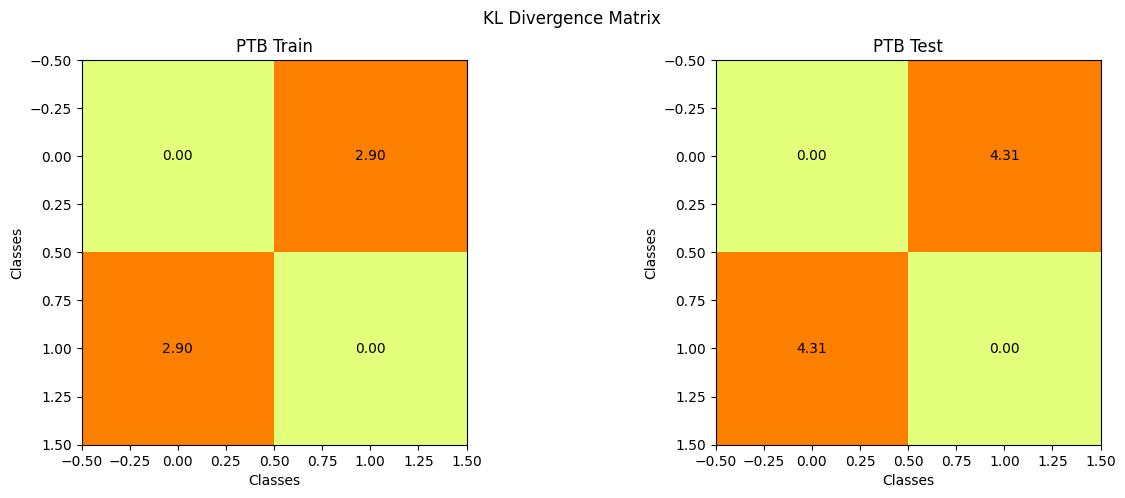

In [11]:
fig, axs = plt.subplots(1, 2, figsize=(15, 5))
fig.suptitle('KL Divergence Matrix')
axs[0].imshow(matrix_train, cmap='Wistia', interpolation='nearest')

# Add the values in the squares
for i in range(matrix_train.shape[0]):
    for j in range(matrix_train.shape[1]):
        axs[0].text(j, i, f'{matrix_train[i, j]:.2f}', ha='center', va='center', color='black')

axs[0].set_title('PTB Train')
axs[0].set_xlabel('Classes')
axs[0].set_ylabel('Classes')
axs[1].imshow(matrix_test, cmap='Wistia', interpolation='nearest')

# Add the values in the squares
for i in range(matrix_test.shape[0]):
    for j in range(matrix_test.shape[1]):
        axs[1].text(j, i, f'{matrix_test[i, j]:.2f}', ha='center', va='center', color='black')

axs[1].set_title('PTB Test')
axs[1].set_xlabel('Classes')
axs[1].set_ylabel('Classes')
plt.savefig("plots/kl_matrix_ptb.png")
plt.show()

In [12]:
matrix_train = kl_divergence_matrix(pca_train_mit_reduced, train_target_mit)
matrix_test = kl_divergence_matrix(pca_test_mit_reduced, test_target_mit)

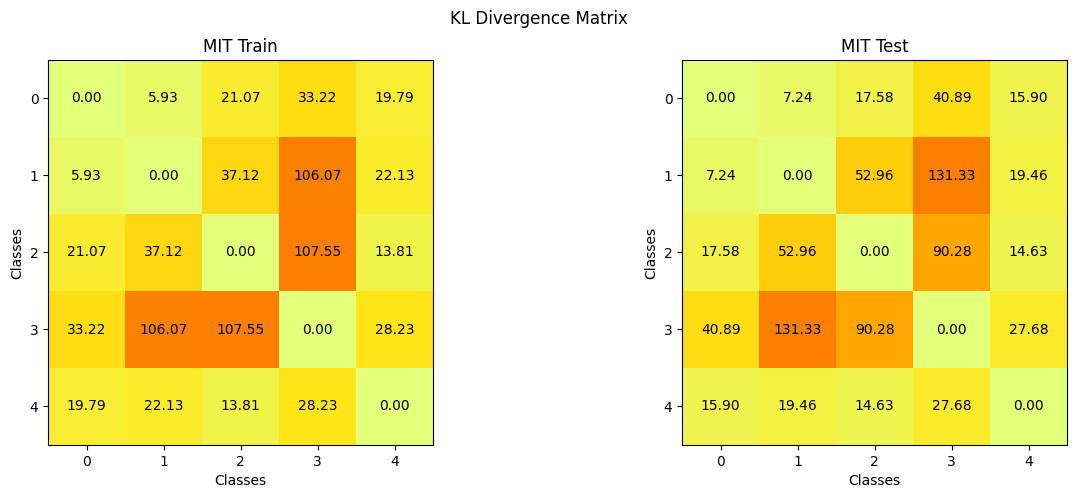

In [13]:
fig, axs = plt.subplots(1, 2, figsize=(15, 5))
fig.suptitle('KL Divergence Matrix')
axs[0].imshow(matrix_train, cmap='Wistia', interpolation='nearest')

# Add the values in the squares
for i in range(matrix_train.shape[0]):
    for j in range(matrix_train.shape[1]):
        axs[0].text(j, i, f'{matrix_train[i, j]:.2f}', ha='center', va='center', color='black')

axs[0].set_title('MIT Train')
axs[0].set_xlabel('Classes')
axs[0].set_ylabel('Classes')
axs[1].imshow(matrix_test, cmap='Wistia', interpolation='nearest')

# Add the values in the squares
for i in range(matrix_test.shape[0]):
    for j in range(matrix_test.shape[1]):
        axs[1].text(j, i, f'{matrix_test[i, j]:.2f}', ha='center', va='center', color='black')

axs[1].set_title('MIT Test')
axs[1].set_xlabel('Classes')
axs[1].set_ylabel('Classes')
plt.savefig("plots/kl_matrix_mit.png")
plt.show()

In [14]:
#calculate the Kl divergence between the mit and ptb data all combinations
kl_mit_ptb_train = compute_kl_divergence(pca_train_mit_reduced, pca_train_ptb_reduced)
kl_mit_ptb_test = compute_kl_divergence(pca_test_mit_reduced, pca_test_ptb_reduced)
kl_mit_ptb_train_test = compute_kl_divergence(pca_train_mit_reduced, pca_test_ptb_reduced)
kl_mit_ptb_test_train = compute_kl_divergence(pca_test_mit_reduced, pca_train_ptb_reduced)
kl_mit = compute_kl_divergence(pca_train_mit_reduced, pca_test_mit_reduced)
kl_ptb = compute_kl_divergence(pca_train_ptb_reduced, pca_test_ptb_reduced)

# print results in a table
print('KL Divergence')
print('MIT Train vs PTB Train:', kl_mit_ptb_train)
print('MIT Test vs PTB Test:', kl_mit_ptb_test)
print('MIT Train vs PTB Test:', kl_mit_ptb_train_test)
print('MIT Test vs PTB Train:', kl_mit_ptb_test_train)
print('MIT Train vs MIT Test:', kl_mit)
print('PTB Train vs PTB Test:', kl_ptb)

KL Divergence
MIT Train vs PTB Train: 0.8556476530088356
MIT Test vs PTB Test: 0.8701853488470868
MIT Train vs PTB Test: 0.9349960094381594
MIT Test vs PTB Train: 0.7983090243808292
MIT Train vs MIT Test: 0.013260160918289658
PTB Train vs PTB Test: 0.03959778084387834


## Two-Sample Kolmogorov-Smirnov Test

In [15]:
# perform the two-sample test
mit_ptb_train = ndtest.ks2d2s(pca_train_mit_reduced[:,0], pca_train_mit_reduced[:,1], pca_train_ptb_reduced[:,0], pca_train_ptb_reduced[:,1])
mit_ptb_test = ndtest.ks2d2s(pca_test_mit_reduced[:,0], pca_test_mit_reduced[:,1], pca_test_ptb_reduced[:,0], pca_test_ptb_reduced[:,1])
mit_ptb_train_test = ndtest.ks2d2s(pca_train_mit_reduced[:,0], pca_train_mit_reduced[:,1], pca_test_ptb_reduced[:,0], pca_test_ptb_reduced[:,1])
mit_ptb_test_train = ndtest.ks2d2s(pca_test_mit_reduced[:,0], pca_test_mit_reduced[:,1], pca_train_ptb_reduced[:,0], pca_train_ptb_reduced[:,1])
mit = ndtest.ks2d2s(pca_train_mit_reduced[:,0], pca_train_mit_reduced[:,1], pca_test_mit_reduced[:,0], pca_test_mit_reduced[:,1])
ptb = ndtest.ks2d2s(pca_train_ptb_reduced[:,0], pca_train_ptb_reduced[:,1], pca_test_ptb_reduced[:,0], pca_test_ptb_reduced[:,1])

# print results in a table
print('Two-sample test')
print('MIT Train vs PTB Train:', mit_ptb_train)
print('MIT Test vs PTB Test:', mit_ptb_test)
print('MIT Train vs PTB Test:', mit_ptb_train_test)
print('MIT Test vs PTB Train:', mit_ptb_test_train)
print('MIT Train vs MIT Test:', mit)
print('PTB Train vs PTB Test:', ptb)

Two-sample test
MIT Train vs PTB Train: 1.931370257317787e-169
MIT Test vs PTB Test: 1.0592328694974098e-39
MIT Train vs PTB Test: 2.229261457427657e-43
MIT Test vs PTB Train: 5.0878844780240654e-126
MIT Train vs MIT Test: 0.11756534505850913
PTB Train vs PTB Test: 0.3088800612934174
